## Simple CNN for Edgelovers


In this notebook you train a very simple CNN with only 1 kernel to discriminate images containing vertical (y=0) from those containing horizontal stripes (y=1). You can use keras for the solution.

![02_Edgelover_Kernel](02_Edgelover_Kernel.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow import keras
from scipy import signal

### a)  Generation of the data
Write a function which creates an artficially dataset of greyscale images (50x50 pixel) with 10 vertical or horizontal bars (10 pixel long). Use this function to create a training and validation dataset of 1000 examples each.

100%|██████████| 1000/1000 [00:07<00:00, 129.64it/s]


(1000, 50, 50, 1)
(1000, 2)


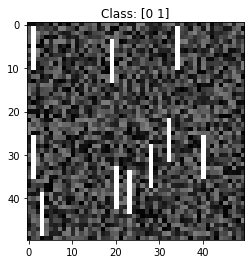

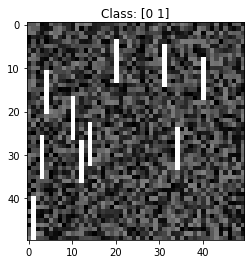

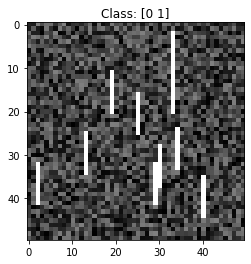

In [2]:
def generate_data(n):
    data = np.empty(shape=(n, 50, 50, 1), dtype=np.uint8)
    classes = np.empty(shape=(n, 2), dtype=np.int)
    for no in tqdm(range(n)):
        data_i = np.zeros((50, 50, 1), dtype=np.uint8)
        # daten mit grauwerten initialisieren
        for i in range(data_i.shape[0]):
            for j in range(data_i.shape[1]):
                data_i[i, j] = np.random.randint(0, 128)

        # weißer Balken erzeugen
        align = np.random.randint(0, 2)
        for num in range(10):
            x = np.random.randint(0, 41)
            y = np.random.randint(0, 41)

            if align == 0: # vertical bar
                for i in range(x, x + 10):
                    data_i[i, y] = 255
            else: # horizontal bar
                for i in range(y, y + 10):
                    data_i[x, i] = 255
        
        # klasse speichern
        class_i = [0.0, 1.0]
        if align == 1:
            class_i = [1.0, 0.0]
        
        data[no] = data_i
        classes[no] = class_i
    return data, classes

train_data, train_classes = generate_data(1000)
test_data, test_classes = generate_data(1000)

print(train_data.shape)
print(train_classes.shape)

plt.title("Class: " + str(train_classes[0]))
plt.imshow(train_data[0, :, :, 0], cmap="gray")
plt.show()
plt.title("Class: " + str(train_classes[1]))
plt.imshow(train_data[1, :, :, 0], cmap="gray")
plt.show()
plt.title("Class: " + str(train_classes[2]))
plt.imshow(train_data[2, :, :, 0], cmap="gray")
plt.show()

### b) Build the simplest possible CNN
Make a CNN with one convolution (5x5, haveing two outputs (one for horizontal, one for vertical). Train the CNN on the data from a). You should have no more than 30 trainable parameters in the network. 
* Plot the learning curves: (epochs vs training loss and validation loss) and epochs vs accuracy.You should get an accuracy of approximatly 1.

Hint: Use the max-pooling operation in a clever way.

In [3]:
batch_size = 16
epochs = 150

In [4]:
# define network
model = keras.models.Sequential()

# convolution layer
model.add(keras.layers.Conv2D(1, kernel_size=5, strides=2, activation="relu", 
    input_shape=(50, 50, 1), kernel_regularizer=keras.regularizers.l2(0.01), bias_regularizer=keras.regularizers.l2(0.01)))
# flattening & pooling layer
model.add(keras.layers.MaxPooling2D(23, strides=23))
model.add(keras.layers.Flatten())
# output layer
model.add(keras.layers.Dense(2, activation="sigmoid"))

# compile network - Frage: Optimizer funktioniert nicht?
model.compile(loss="binary_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 23, 23, 1)         26        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 1)           0         
_________________________________________________________________
flatten (Flatten)            (None, 1)                 0         
_________________________________________________________________
dense (Dense)                (None, 2)                 4         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [5]:
# fit network
fit_model = model.fit(train_data, train_classes, batch_size=batch_size,
    epochs=epochs, validation_data=(test_data, test_classes), verbose=2)

Epoch 1/150
63/63 - 1s - loss: 26.0249 - accuracy: 0.5190 - val_loss: 8.9137 - val_accuracy: 0.5190
Epoch 2/150
63/63 - 0s - loss: 2.4484 - accuracy: 0.7180 - val_loss: 0.8511 - val_accuracy: 0.7060
Epoch 3/150
63/63 - 0s - loss: 0.6834 - accuracy: 0.6660 - val_loss: 0.6705 - val_accuracy: 0.6750
Epoch 4/150
63/63 - 0s - loss: 0.6088 - accuracy: 0.7260 - val_loss: 0.6051 - val_accuracy: 0.7040
Epoch 5/150
63/63 - 0s - loss: 0.5333 - accuracy: 0.8140 - val_loss: 0.5002 - val_accuracy: 0.8470
Epoch 6/150
63/63 - 0s - loss: 0.4536 - accuracy: 0.8900 - val_loss: 0.4345 - val_accuracy: 0.9050
Epoch 7/150
63/63 - 0s - loss: 0.3958 - accuracy: 0.9340 - val_loss: 0.3931 - val_accuracy: 0.9360
Epoch 8/150
63/63 - 0s - loss: 0.3572 - accuracy: 0.9510 - val_loss: 0.3681 - val_accuracy: 0.9150
Epoch 9/150
63/63 - 0s - loss: 0.3293 - accuracy: 0.9550 - val_loss: 0.3219 - val_accuracy: 0.9600
Epoch 10/150
63/63 - 0s - loss: 0.2974 - accuracy: 0.9700 - val_loss: 0.2998 - val_accuracy: 0.9650
Epoch 11

In [6]:
# evaluate network
train_score = model.evaluate(train_data, train_classes)
test_score = model.evaluate(test_data, test_classes)
print("Train data: Loss: {} | Accuracy: {}\nTest data: Loss: {} | Accuracy: {}".format(train_score[0], 
    train_score[1], test_score[0], test_score[1]))

32/32 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.9960
Train data: Loss: 0.014693242497742176 | Accuracy: 0.9980000257492065
Test data: Loss: 0.010466055013239384 | Accuracy: 0.9959999918937683


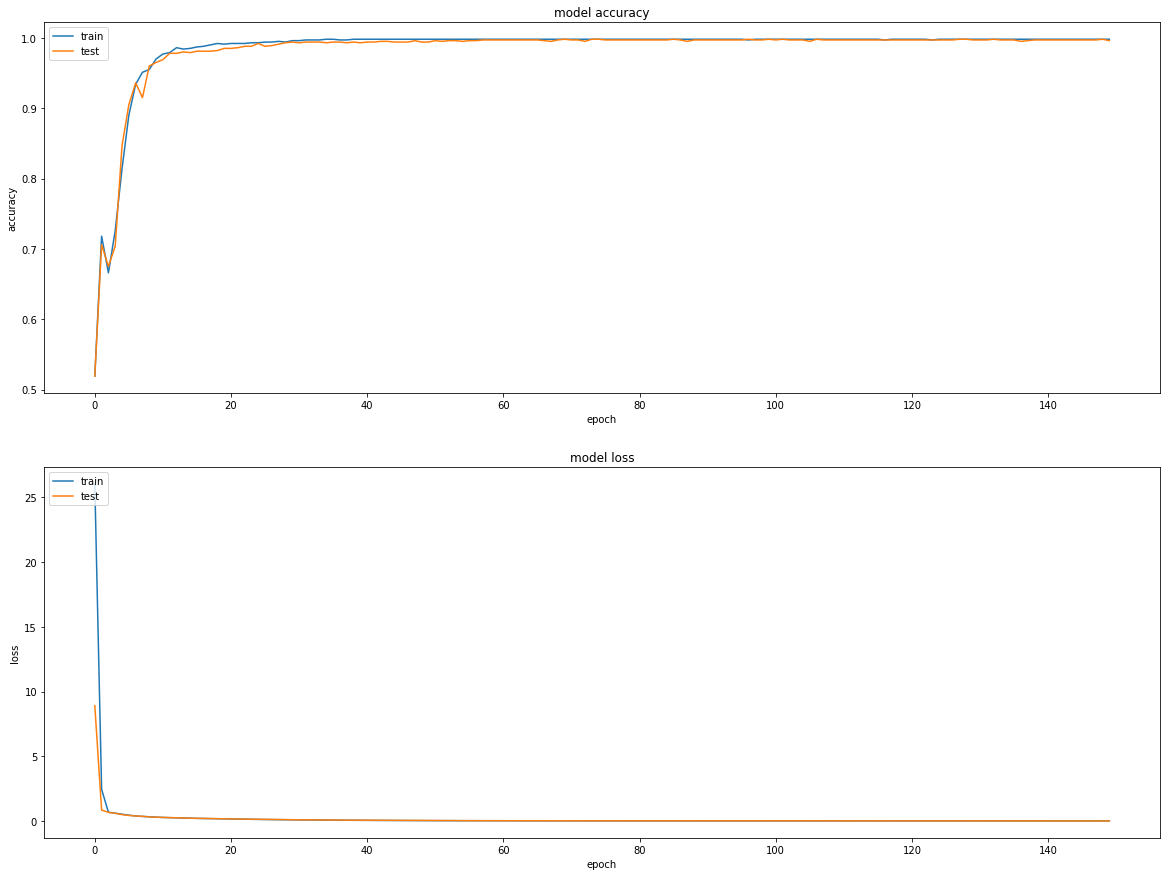

In [7]:
# plot results
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))
axes[0].plot(fit_model.history['accuracy'])
axes[0].plot(fit_model.history['val_accuracy'])
axes[0].set_title('model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'test'], loc='upper left')

axes[1].plot(fit_model.history['loss'])
axes[1].plot(fit_model.history['val_loss'])
axes[1].set_title('model loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'test'], loc='upper left')

### c) Visualize the learned kernel
Visualize the learned kernel, you might want to use `model.get_weights()`. Does the learned kernel makes sense?

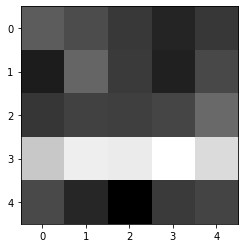

In [8]:
weights, _ = model.layers[0].get_weights()
plt.imshow(weights[:, :, 0, 0], cmap="gray")

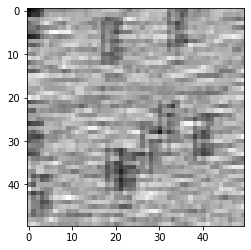

In [9]:
# plot first vertical image weights
index = np.where(train_classes == [0.0, 1.0])[0][0] # horizontal or vertical | num image? (0 - 1037)
img = train_data[index, :, :, 0]
grad = signal.convolve2d(img, weights[:, :, 0, 0], boundary='symm', mode='same')
plt.imshow(grad, cmap='gray')

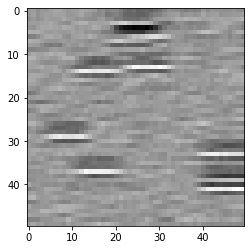

In [10]:
# plot first horizontal image weights
index = np.where(train_classes == [1.0, 0.0])[0][0]
img = train_data[index, :, :, 0]
grad = signal.convolve2d(img, weights[:, :, 0, 0], boundary='symm', mode='same')
plt.imshow(grad, cmap='gray')